# MNIST 손글씨 - CNN v2
 - 2 Conv2D layers
 - 1 MaxPlling2D layer
 - 1 Dropout(0.25) layer
 - 1 Fully Connected Network layer
 - 1 Dropout(0.5) layer
 - 1 Output layer

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.

In [4]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의,설정,학습,평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model_path = 'best-mnist-cnn-v3.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [9]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[checkpoint, early_stop], verbose=0
)


Epoch 00001: val_loss improved from inf to 0.05660, saving model to best-mnist-cnn-v3.h5

Epoch 00002: val_loss improved from 0.05660 to 0.05054, saving model to best-mnist-cnn-v3.h5

Epoch 00003: val_loss improved from 0.05054 to 0.03950, saving model to best-mnist-cnn-v3.h5

Epoch 00004: val_loss improved from 0.03950 to 0.03733, saving model to best-mnist-cnn-v3.h5

Epoch 00005: val_loss did not improve from 0.03733

Epoch 00006: val_loss improved from 0.03733 to 0.03210, saving model to best-mnist-cnn-v3.h5

Epoch 00007: val_loss did not improve from 0.03210

Epoch 00008: val_loss did not improve from 0.03210

Epoch 00009: val_loss did not improve from 0.03210

Epoch 00010: val_loss did not improve from 0.03210

Epoch 00011: val_loss did not improve from 0.03210

Epoch 00012: val_loss did not improve from 0.03210

Epoch 00013: val_loss did not improve from 0.03210

Epoch 00014: val_loss did not improve from 0.03210

Epoch 00015: val_loss did not improve from 0.03210

Epoch 00016: 

In [10]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9914


[0.02833237685263157, 0.9914000034332275]

- 훈련과정 시각화

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  """


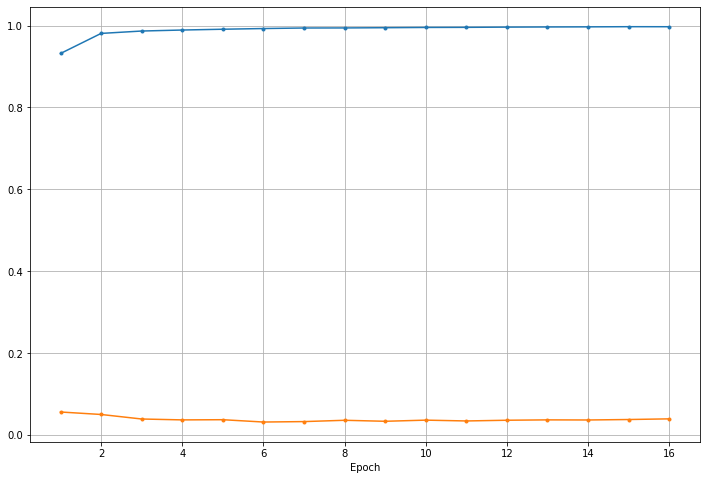

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, '-o', ms=3, markersize=3, label='trainn accuracy')
plt.plot(xs, y_vloss, '-o', ms=3, markersize=3, label='validation loss')
plt.legend
plt.grid()
plt.xlabel('Epoch')
plt.show()